In [1]:
# Before Having a deep dive into the Data, Importing Modules


import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#                    Happiness Level of Countries by Regions in Years




## Contents
1. Introduction
2. The Aim of Analysis
3. General Information of the Data
4. Arrangements of the Data Sets
5. Cleaning of the Row Data 
6. Data Exploration 
7. Feature Engineering
8. Conclusions 


## 1. Introduction 

Happiness can be come through many factors such as income, freedom or relationships and more. While sharing the same world together, this study will show whether all of us are happy or not, with providing scientific conclusions via using main factors.

This study is based on The World Happiness Report which was published 2012, 2013, 2015, 2016 and 2017 aiming to demostrate global happiness.


## 2. The Aim of Analysis

Study will search Happiness_Score by examining 9 main factors based on 166 countries;
'Country','Region', 'Economy_GDP_per_Capita','Family','Health_Life_Expectancy','Freedom', 'Trust_Government_Corruption','Generosity', 'Dystopia_Residual'. 

Data will show how happiness score explains personal and national variations in happiness.  


## 3. General Information of the Data

We have 3 different data sets that rely on 2015, 2016, 2017's surveys. 

**Columns**:

**Country**:                       Name of the country.

**Region**:                        Region the country belongs to.

**Happiness Rank**:                Rank of the country based on the Happiness Score.

**Happiness Score**:               A metric measured in 2015 by asking the sampled people the question: "How would you rate your                                  happiness on a scale of 0 to 10 where 10 is the happiest."

**Economy (GDP per Capita)**:      The extent to which GDP contributes to the calculation of the Happiness Score. 

**Family**:                        The extent to which Family contributes to the calculation of the Happiness Score

**Health (Life Expectancy)**:      The extent to which Life expectancy contributed to the calculation of the Happiness Score

**Freedom**:                       The extent to which Freedom contributed to the calculation of the Happiness Score.

**Trust (Government Corruption)**: The extent to which Perception of Corruption contributes to Happiness Score.

**Generosity**:                    The extent to which Generosity contributed to the calculation of the Happiness Score.

**Dystopia Residual**:             The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.
(Dystopia is an imaginary country where most unhappy people live. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. “Dystopia” was created in contrast to Utopia.)


## 4. Arrangements of the Data Sets

In [2]:
df2015 = pd.read_csv("data/2015.csv")
df2016 = pd.read_csv("data/2016.csv")
df2017 = pd.read_csv("data/2017.csv")

In [3]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [4]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [5]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


Above, we see general information of data sets which gives different data sizes.

In [6]:
print(df2015.columns, df2016.columns, df2017.columns, sep = " \n" )

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


### 4-a) Eualizing columns of each data sets

In order to arrange our data frame, some columns have been removed from each data set. 

In [7]:
#'Standard Error' column has been deleted from 2015 data. 


df2015 = df2015.drop('Standard Error', axis=1)

In [8]:
# New column names have been amended to the data set. 

df2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption','Generosity', 'Dystopia_Residual']

In [9]:
df2015["Year"] = 2015

In [10]:
df2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [11]:
#'Upper Confidence Interval' and 'Lower Confidence Interval' column have been deleted from 2016 data set. 


df2016 = df2016.drop(['Upper Confidence Interval','Lower Confidence Interval'], axis =1 )

In [12]:
# New column names have been amended to the data set. 


df2016.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption','Generosity', 'Dystopia_Residual']

In [13]:
df2016["Year"] = 2016

In [14]:
df2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [15]:
#'Whisker.high' and 'Whisker.low' column have been deleted from 2017 data set. 


df2017 =  df2017.drop(['Whisker.high','Whisker.low'],axis =1 )

In [16]:
# New column names have been amended to the data set. 


df2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual']

In [17]:
df2017["Year"] = 2017

In [18]:
df2017.head()

,Country,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


### 4-b) Checking last versions of each data sets 

In [19]:
print(df2015.columns, df2016.columns, df2017.columns, sep = " \n" )

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual',
       'Year'],
      dtype='object') 
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual',
       'Year'],
      dtype='object') 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual',
       'Year'],
      dtype='object')


### 4-c)Creating a new data frame as Hapiness_report by collating 3 data sets; df2015, df2016, df2017 

In [20]:
frames = [df2015, df2016, df2017]

Hapiness_report = pd.concat(frames,sort=True,ignore_index=True)
Hapiness_report.head()

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


### 4.d)Exploring Null Values

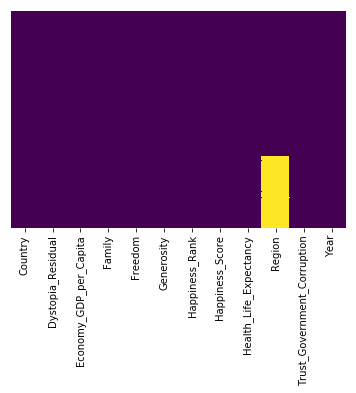

In [21]:
sns.heatmap(Hapiness_report.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [22]:
Sum = Hapiness_report.isnull().sum()
Percentage = ( Hapiness_report.isnull().sum()/Hapiness_report.isnull().count() )

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])


,Sum,Percentage
Country,0,0.000000
Dystopia_Residual,0,0.000000
Economy_GDP_per_Capita,0,0.000000
Family,0,0.000000
Freedom,0,0.000000
Generosity,0,0.000000
Happiness_Rank,0,0.000000
Happiness_Score,0,0.000000
Health_Life_Expectancy,0,0.000000
Region,155,0.329787


We only have missing values in Region Column 

## 5. Cleaning of the Row Data

In [23]:
Happiness_report2 = Hapiness_report.copy()

In [24]:
try:
    for country in Happiness_report2.Country.unique():
        Happiness_report2.loc[Happiness_report2['Country']==str(country),'Region']=Happiness_report2[Happiness_report2['Country']==str(country)].Region.mode()[0]
except IndexError:
    pass

In [25]:
Happiness_report2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
Country                        470 non-null object
Dystopia_Residual              470 non-null float64
Economy_GDP_per_Capita         470 non-null float64
Family                         470 non-null float64
Freedom                        470 non-null float64
Generosity                     470 non-null float64
Happiness_Rank                 470 non-null int64
Happiness_Score                470 non-null float64
Health_Life_Expectancy         470 non-null float64
Region                         468 non-null object
Trust_Government_Corruption    470 non-null float64
Year                           470 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 44.1+ KB


### 5-a)After filling missing values in Region Column by Mode function, we do still have 2 more missing values. 

In [26]:
#Lets have a look at the countries which do not have region information in the data set.


Happiness_report2[Happiness_report2['Region'].isna()]

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
347,Taiwan Province of China,2.126607,1.433627,1.384565,0.361467,0.258360,33,6.422,0.793984,NaN,0.063829,2017
385,"Hong Kong S.A.R., China",0.554633,1.551675,1.262791,0.490969,0.374466,71,5.472,0.943062,NaN,0.293934,2017


In [27]:
#Lets check if China exsists in the previous rows. 

Happiness_report2[Happiness_report2.Country == "China"]

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
83,China,1.860400,0.890120,0.946750,0.516970,0.081850,84,5.140,0.816580,Eastern Asia,0.027810,2015
240,China,2.170870,1.027800,0.793810,0.440120,0.049590,83,5.245,0.735610,Eastern Asia,0.027450,2016
393,China,1.764939,1.081166,1.160837,0.472788,0.028807,79,5.273,0.741416,Eastern Asia,0.022794,2017


### 5-b) As having China in Country column as Eastern Asia region, we will assign Eastern Asia manually into the 'Region Column'. 

In [28]:
Happiness_report2.loc[[347,385], 'Region'] = "Eastern Asia"

In [29]:
Happiness_report2.loc[385].Region

'Eastern Asia'

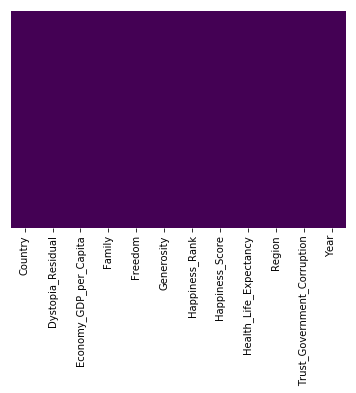

In [30]:
sns.heatmap(Happiness_report2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Now we have all values filled in to the data set. 

## 6. Data Exploration

Lets have a quick look at corelations between variables.

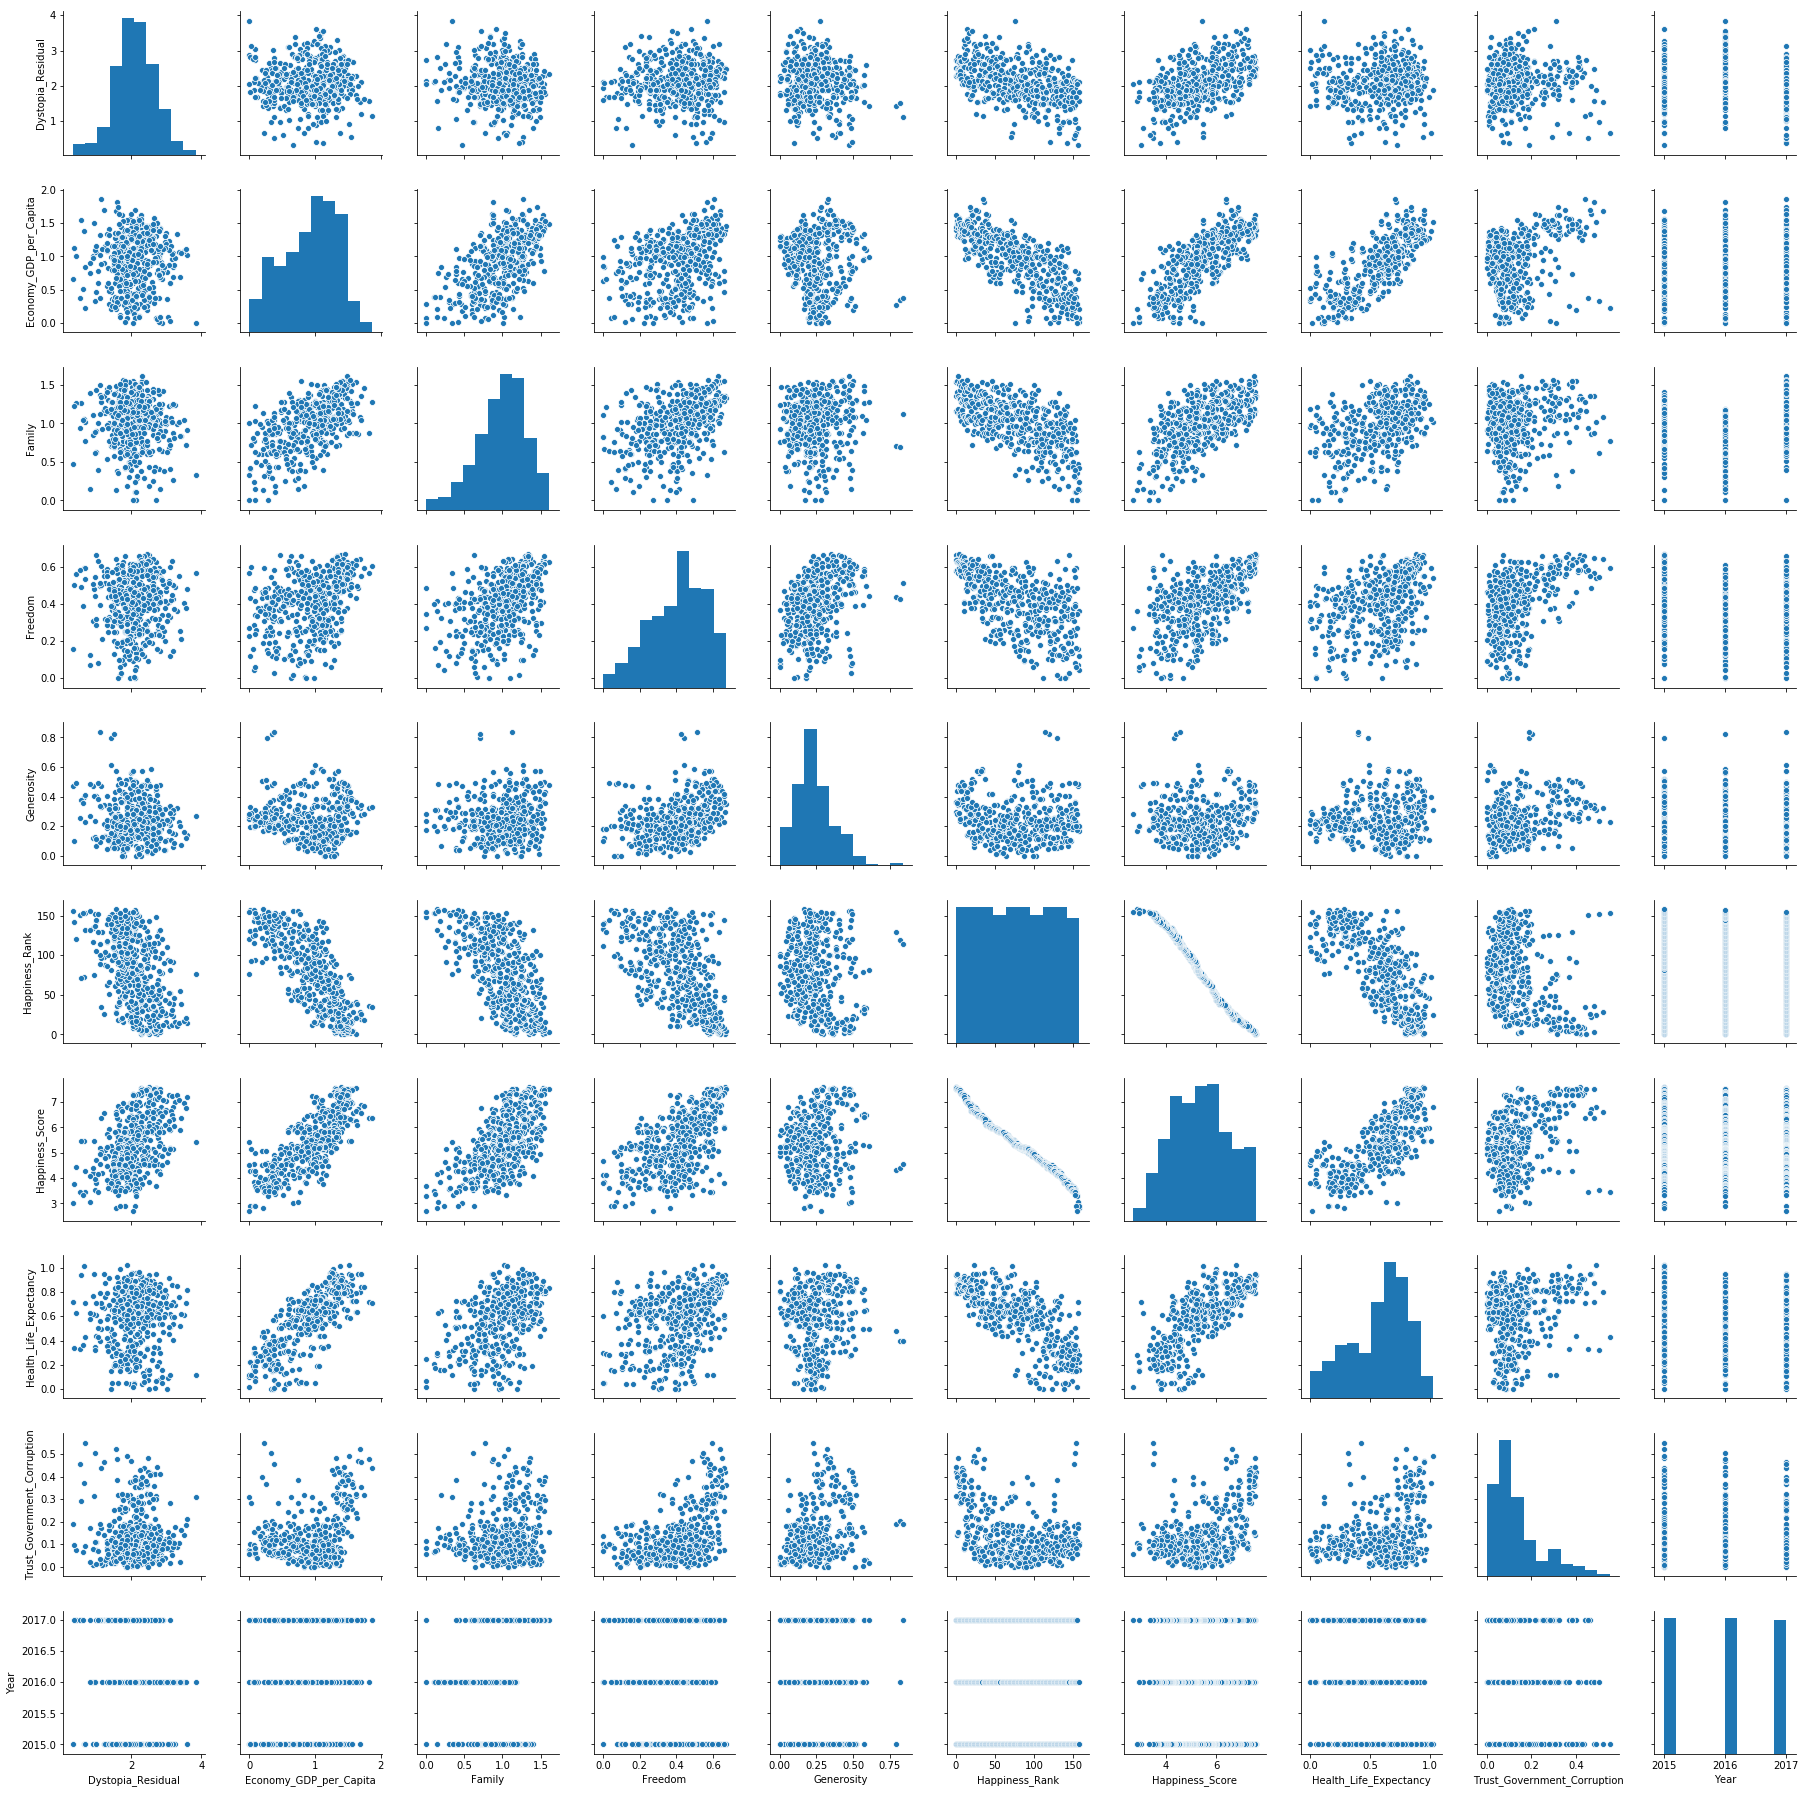

In [31]:
sns.pairplot(Happiness_report2)

Apperantly, some variabes have positive relations with each other. Lets search for more details.

### 6-a)Distribution of Variables 

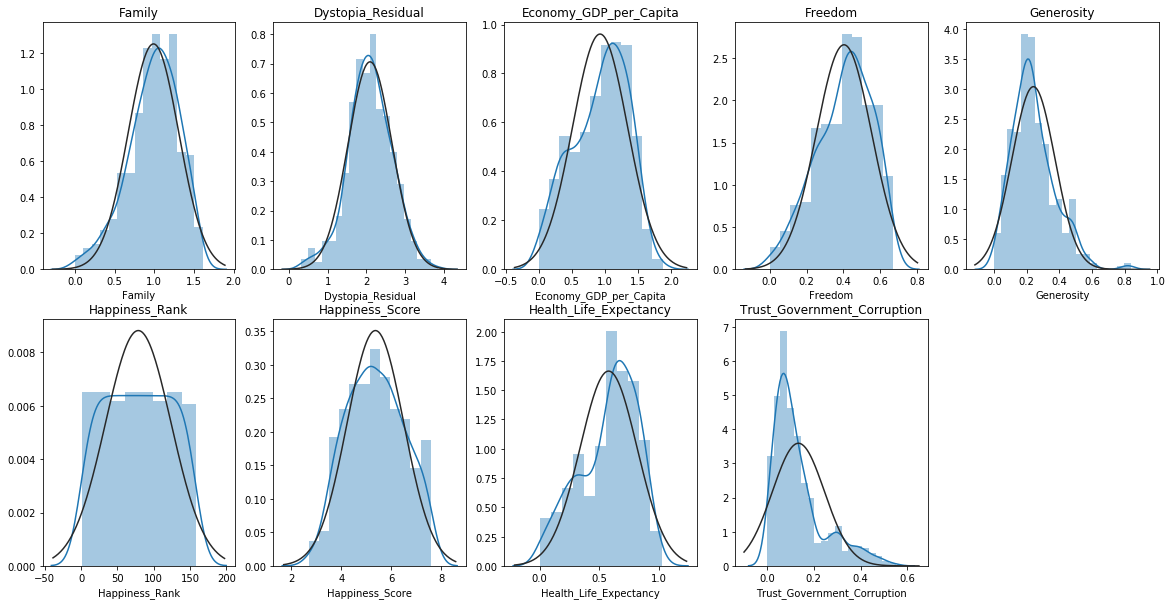

In [32]:
from scipy.stats import norm 


plt.figure(figsize = (20,10)) 

plt.subplot(2,5,1)
sns.distplot(Happiness_report2["Family"],fit=norm) 
plt.title("Family")

plt.subplot(2,5,2)
sns.distplot(Happiness_report2["Dystopia_Residual"],fit=norm)
plt.title("Dystopia_Residual")

plt.subplot(2,5,3)
sns.distplot(Happiness_report2["Economy_GDP_per_Capita"], fit=norm)
plt.title("Economy_GDP_per_Capita")

plt.subplot(2,5,4)
sns.distplot(Happiness_report2["Freedom"], fit=norm)
plt.title("Freedom")

plt.subplot(2,5,5)
sns.distplot(Happiness_report2["Generosity"],fit=norm)
plt.title("Generosity")

plt.subplot(2,5,6)
sns.distplot(Happiness_report2["Happiness_Rank"], fit=norm)
plt.title("Happiness_Rank")

plt.subplot(2,5,7)
sns.distplot(Happiness_report2["Happiness_Score"], fit=norm)
plt.title("Happiness_Score")

plt.subplot(2,5,8)
sns.distplot(Happiness_report2["Health_Life_Expectancy"], fit=norm)
plt.title("Health_Life_Expectancy")

plt.subplot(2,5,9)
sns.distplot(Happiness_report2["Trust_Government_Corruption"], fit=norm)
plt.title("Trust_Government_Corruption")



plt.show()

We do ignore Happiness_rank scores as this column contains only index. 
Variables has normal distrubtions except Generosity, Trust goverment and Health_Life_Expectancy. 

Text(0.5, 1.0, 'Trust_Government_Corruption')

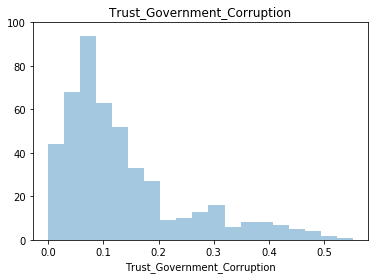

In [33]:
#In order to have a deep understanding of those variables, we can remove fit norm factor by using 'kde' function. 

sns.distplot(Happiness_report2["Trust_Government_Corruption"], kde=False)
plt.ylim(0,100)
plt.title("Trust_Government_Corruption")

Text(0.5, 1.0, 'Generosity')

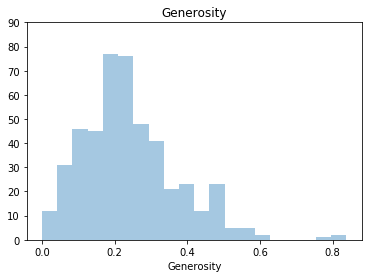

In [34]:
sns.distplot(Happiness_report2["Generosity"], kde=False)
plt.ylim(0,90)
plt.title("Generosity")

Text(0.5, 1.0, 'Health_Life_Expectancy.')

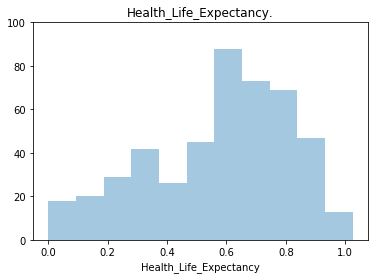

In [35]:
sns.distplot(Happiness_report2["Health_Life_Expectancy"], kde=False)
plt.ylim(0,100)
plt.title("Health_Life_Expectancy.")

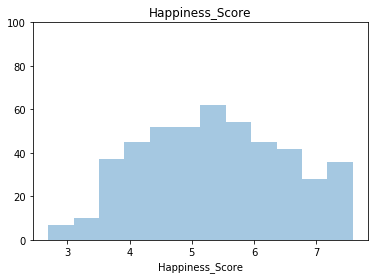

In [36]:
sns.distplot(Happiness_report2["Happiness_Score"], kde=False)
plt.ylim(0,100)
plt.title("Happiness_Score")
plt.show()

Happiness Score falls more between 4 and 6 scores. We do not have 10 score on a 10 point scale.  

Happiness Score is slightly decreasing in 2017. 

### 6-b) Means of Happiness Report2 by years

In [37]:
mean_by_year = Happiness_report2.groupby(by="Year").mean()["Happiness_Score"] 
print(mean_by_year[2015])
print(mean_by_year[2016])
print(mean_by_year[2017])

5.3757341772151905
5.382184713375795
5.354019355773926


## T testi  ##

In [38]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from statsmodels.stats.weightstats import ttest_ind

In [39]:
Happiness_Score_2015 = Happiness_report2[Happiness_report2["Year"] == 2015].Happiness_Score
Happiness_Score_2016 = Happiness_report2[Happiness_report2["Year"] == 2016].Happiness_Score 
Happiness_Score_2017 = Happiness_report2[Happiness_report2["Year"] == 2017].Happiness_Score 


In [40]:
stats.ttest_ind(Happiness_Score_2015, Happiness_Score_2016)


Ttest_indResult(statistic=-0.05006570414802805, pvalue=0.9601019629276167)

In [41]:
stats.ttest_ind(Happiness_Score_2016, Happiness_Score_2017)


Ttest_indResult(statistic=0.21886946076908392, pvalue=0.8268957624193368)

Happiness Score changes unmeaningful and there is no evidence to prove changes between years. 

#### A quick look at Happiness Score by Years on a graph. 

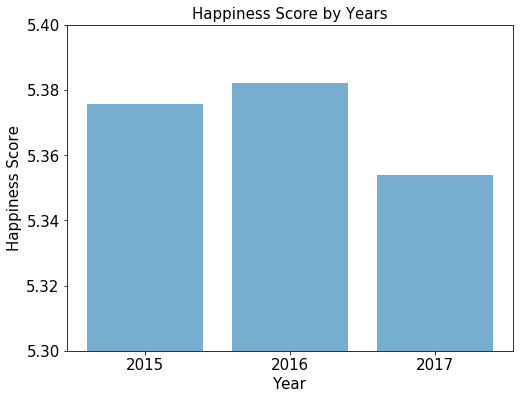

In [42]:
plt.figure(figsize = (8,6))

objects = ('2015','2016','2017')
y_pos = np.arange(len(objects)) # y_pos kac tane object varsa o kdrlik bir array olusturuyor. Bar plot altina isimlerini yazar
performance =[mean_by_year[2015], mean_by_year[2016], mean_by_year[2017]]
 
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.yticks(size=15)
plt.xticks(y_pos, objects,size=15)
plt.xlabel('Year',size=15)
plt.ylabel('Happiness Score',size=15)
plt.title('Happiness Score by Years', fontsize=15)

plt.ylim(5.30,5.40)

plt.show()

### 6-c) The means of Happiness Score by Years and Regions 

In [43]:
mean_by_year_and_region = Happiness_report2.groupby(by=["Region", "Year"]).mean()["Happiness_Score"]

In [44]:
mean_by_year_and_region=mean_by_year_and_region.reset_index()

In [45]:
mean_by_year_and_region.head()

,Region,Year,Happiness_Score
0,Australia and New Zealand,2015,7.285000
1,Australia and New Zealand,2016,7.323500
2,Australia and New Zealand,2017,7.299000
3,Central and Eastern Europe,2015,5.332931
4,Central and Eastern Europe,2016,5.370690


(0, 10)

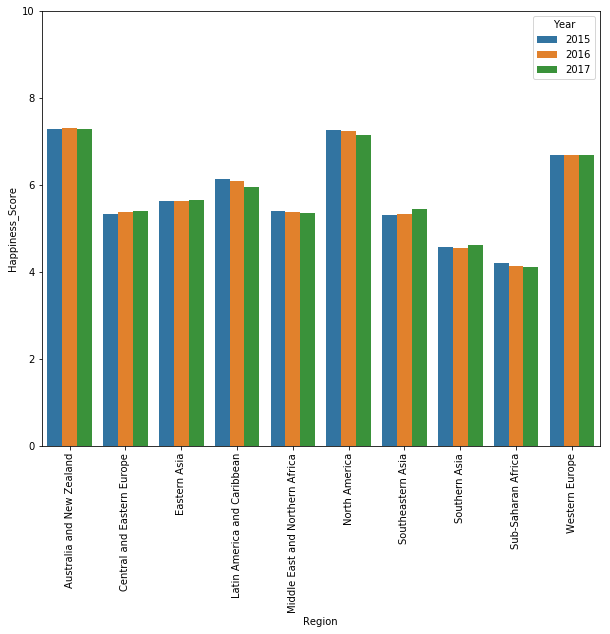

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x="Region", y="Happiness_Score", hue="Year", data=mean_by_year_and_region)
plt.xticks(rotation=90)
plt.ylim((0,10))

Happiness score is slightly increasing in 5 regions. 
Western Europe region gives almost same results that cannot be shown on the graph. 
Happiness score is decreasing in 4 regions. 

### 6-d)Overview of Hapiness Score and Dystopia_Residual in Turkey 

In [47]:
years_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Year']

In [48]:
Happiness_Score_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Happiness_Score']

In [49]:
Dystopia_Residual_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Dystopia_Residual']

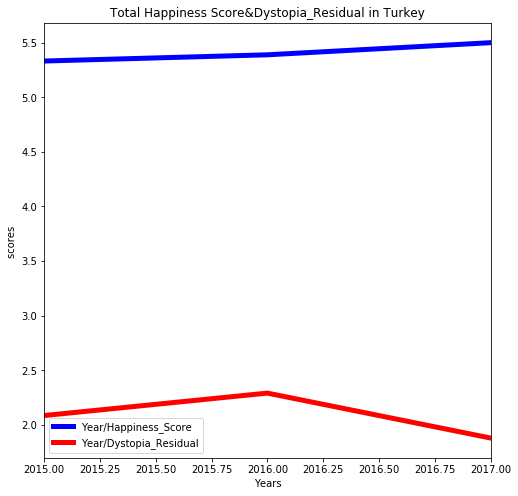

In [50]:
plt.figure(1, figsize = (8,8))
plt.plot(years_Turkey, Happiness_Score_Turkey, label = 'Year/Happiness_Score', color='blue', linewidth=5)
plt.plot(years_Turkey,Dystopia_Residual_Turkey, label = 'Year/Dystopia_Residual',color='red', linewidth=5)
plt.xlabel('Years')
plt.ylabel('scores ')
plt.xlim([2015, 2017])
plt.title('Total Happiness Score&Dystopia_Residual in Turkey')
plt.legend()
plt.show()

Happiness score is increasing slowly from 2015 to 2017 in Turkey. Until 2016, two variables has a pozitive corellation until 2016, than corellation turns to negative in 2017 by refering opposite directions on the graph. 

### 6-e) General Looking at Some Factors with Happiness Score  Based on  Regions 

In [51]:
Happiness_report2["Economy_GDP_per_Capita"].head()

0    1.39651
1    1.30232
2    1.32548
3    1.45900
4    1.32629
Name: Economy_GDP_per_Capita, dtype: float64

Text(0, 0.5, 'Health_Life_Expectancy')

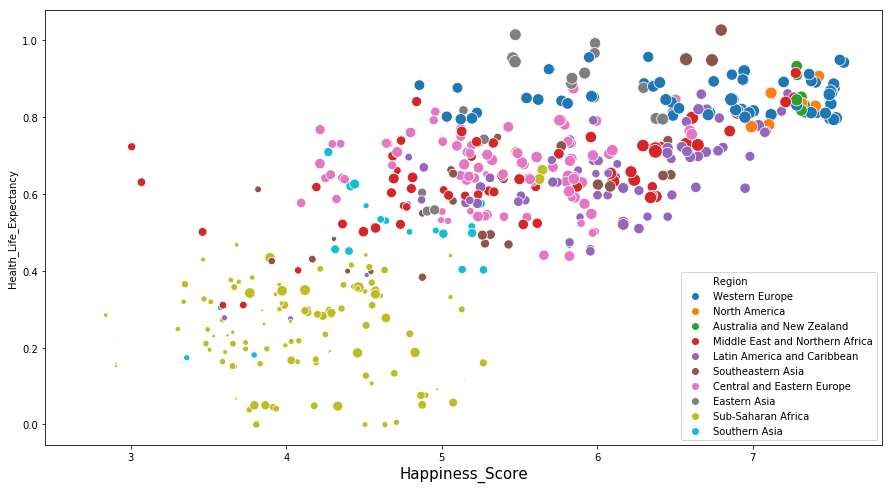

In [52]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness_Score', y='Health_Life_Expectancy', hue='Region',data=Happiness_report2, s = Happiness_report2.Economy_GDP_per_Capita*100);
plt.xlabel('Happiness_Score',size=15)
plt.ylabel('Health_Life_Expectancy', size =10)

Africa region does not show a clear relation between variables. 
Other regions have more tight spots within itself. 
As we see in pair plot show earlier, we have a positive corellation  between these variables. It is also happeningin each regions except Sub-Saharan Africa region. 


Text(0, 0.5, 'Economy_GDP_per_Capita')

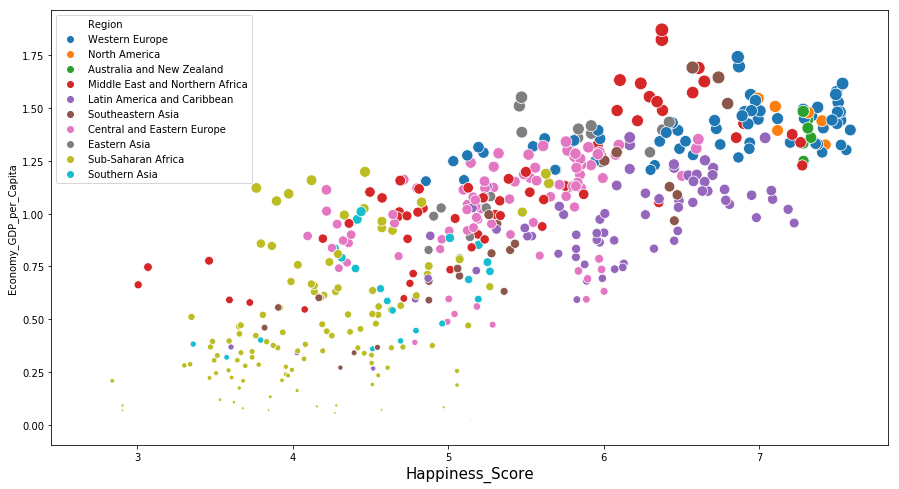

In [53]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness_Score', y='Economy_GDP_per_Capita', hue='Region',data=Happiness_report2, s = Happiness_report2.Economy_GDP_per_Capita*100);
plt.xlabel('Happiness_Score',size=15)
plt.ylabel('Economy_GDP_per_Capita', size =10)

Text(0, 0.5, 'Family')

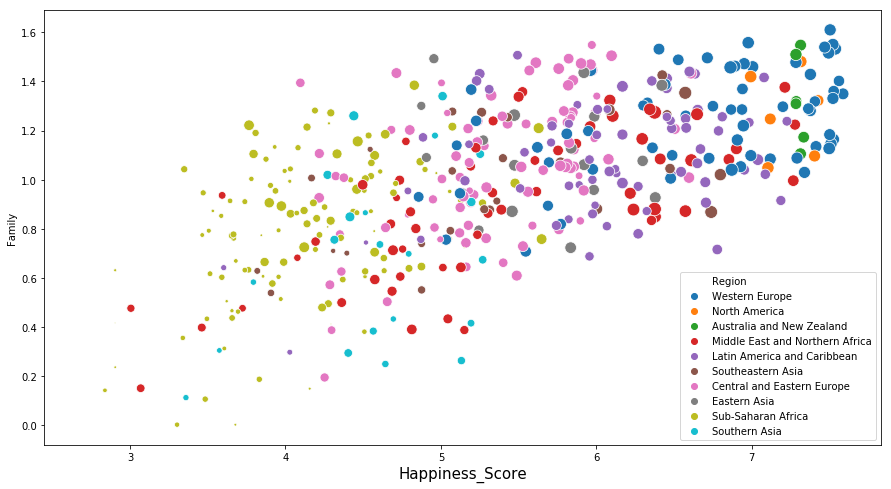

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness_Score', y='Family', hue='Region',data=Happiness_report2, s = Happiness_report2.Economy_GDP_per_Capita*100);
plt.xlabel('Happiness_Score',size=15)
plt.ylabel('Family', size =10)

Text(0, 0.5, 'Trust_Government_Corruption')

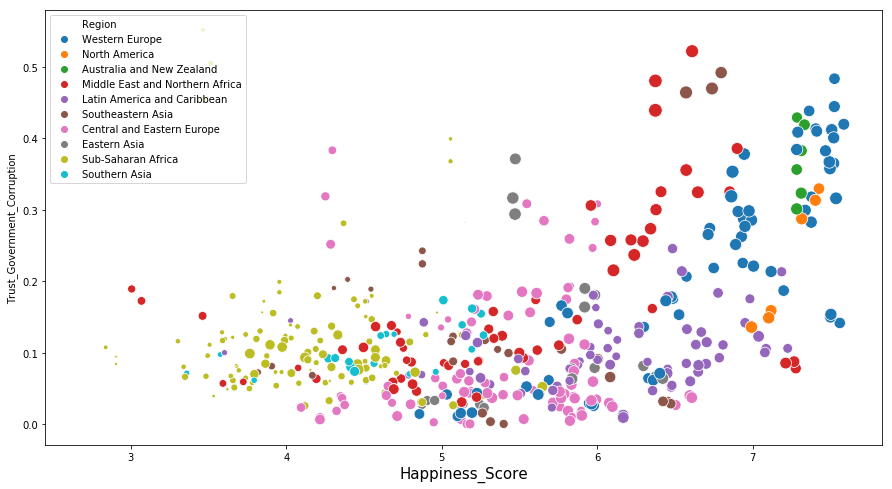

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness_Score', y='Trust_Government_Corruption', hue='Region',data=Happiness_report2, s = Happiness_report2.Economy_GDP_per_Capita*100);
plt.xlabel('Happiness_Score',size=15)
plt.ylabel('Trust_Government_Corruption', size =10)

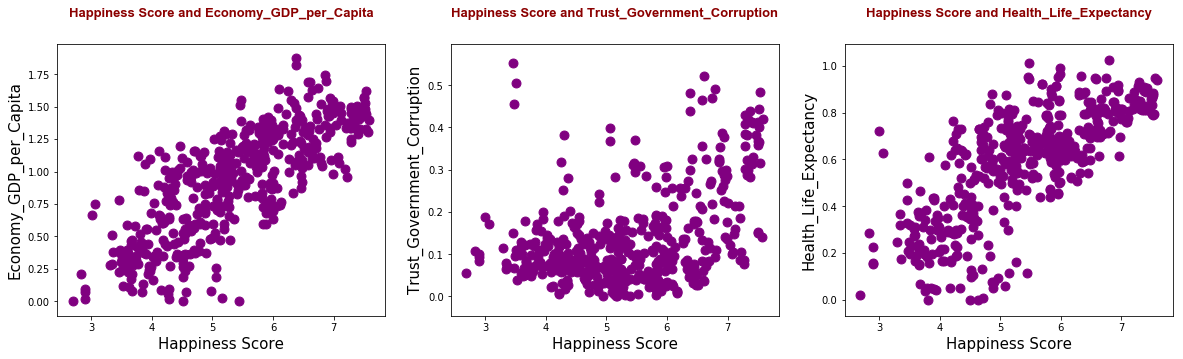

In [56]:
# As we see in previous results, 3 variables have a close relation with each other. Lets have a further reseach on those ones.  


fig, axes = plt.subplots(1,3,figsize=(20,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }

happiness_score_by_three_variables = ['Economy_GDP_per_Capita','Trust_Government_Corruption', 'Health_Life_Expectancy'] 
 
for i in range(0,3):
    
    plt.subplot(1, 3, i+1)
    plt.scatter(Happiness_report2['Happiness_Score'],Happiness_report2[happiness_score_by_three_variables[i]],c='purple', s=80)
    plt.title('Happiness Score and '+ str(happiness_score_by_three_variables[i]), fontdict=baslik_font, fontsize=13, y=1.08)
    plt.xlabel('Happiness Score',size=15)
    plt.ylabel(str(happiness_score_by_three_variables[i]),size=15)

Economy_GDP_per_Capita and Health_Life-Expectancy have a positive corelation with each other. 

Turst_Government_Corruption shows that it has an exponential correlation between happiness score. As long as citizens feel secure, they are happy. Especially after a certain point of score 7,  Happiness score increases very fast. 

### 6-f)Corellation between Variables 

In [57]:
Corr_Matrix = Happiness_report2.corr()
Corr_Matrix

,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Trust_Government_Corruption,Year
Dystopia_Residual,1.000000,0.030087,-0.081537,0.038422,-0.114468,-0.482706,0.489747,0.057674,0.000001,-0.177951
Economy_GDP_per_Capita,0.030087,1.000000,0.585449,0.344962,-0.014173,-0.790551,0.785450,0.792224,0.301935,0.136445
Family,-0.081537,0.585449,1.000000,0.425377,0.071775,-0.637627,0.636532,0.486383,0.158605,0.251134
Freedom,0.038422,0.344962,0.425377,1.000000,0.343389,-0.547627,0.560353,0.359566,0.490405,-0.054697
Generosity,-0.114468,-0.014173,0.071775,0.343389,1.000000,-0.146162,0.163562,0.077326,0.287414,0.029782
Happiness_Rank,-0.482706,-0.790551,-0.637627,-0.547627,-0.146162,1.000000,-0.993268,-0.750146,-0.384371,-0.013460
Happiness_Score,0.489747,0.785450,0.636532,0.560353,0.163562,-0.993268,1.000000,0.748040,0.406340,-0.007761
Health_Life_Expectancy,0.057674,0.792224,0.486383,0.359566,0.077326,-0.750146,0.748040,1.000000,0.262932,-0.134582
Trust_Government_Corruption,0.000001,0.301935,0.158605,0.490405,0.287414,-0.384371,0.406340,0.262932,1.000000,-0.074393
Year,-0.177951,0.136445,0.251134,-0.054697,0.029782,-0.013460,-0.007761,-0.134582,-0.074393,1.000000


In [58]:
Corr_Matrix.Happiness_Score.sort_values()

Happiness_Rank                -0.993268
Year                          -0.007761
Generosity                     0.163562
Trust_Government_Corruption    0.406340
Dystopia_Residual              0.489747
Freedom                        0.560353
Family                         0.636532
Health_Life_Expectancy         0.748040
Economy_GDP_per_Capita         0.785450
Happiness_Score                1.000000
Name: Happiness_Score, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

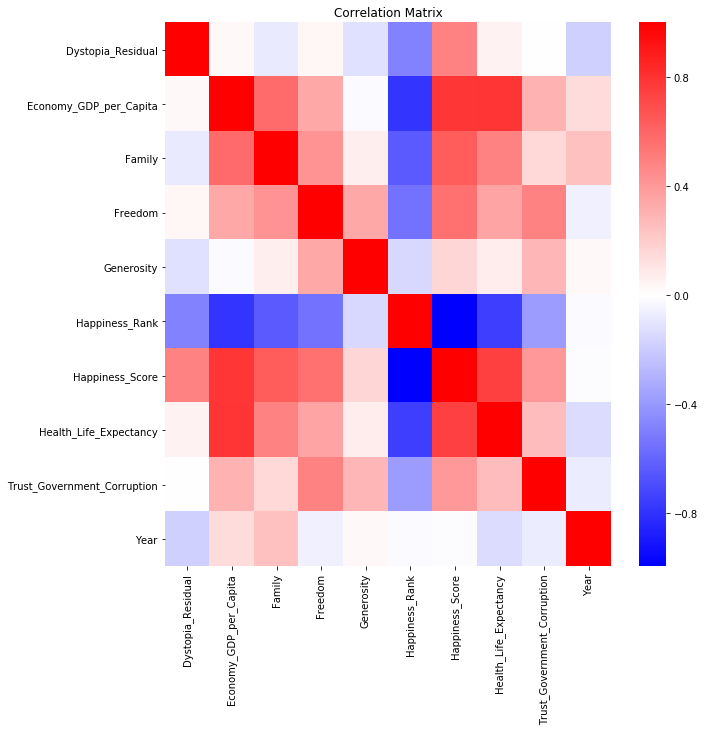

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Matrix, cmap='bwr')
plt.title('Correlation Matrix')

### 6-g) General Look at Outliers

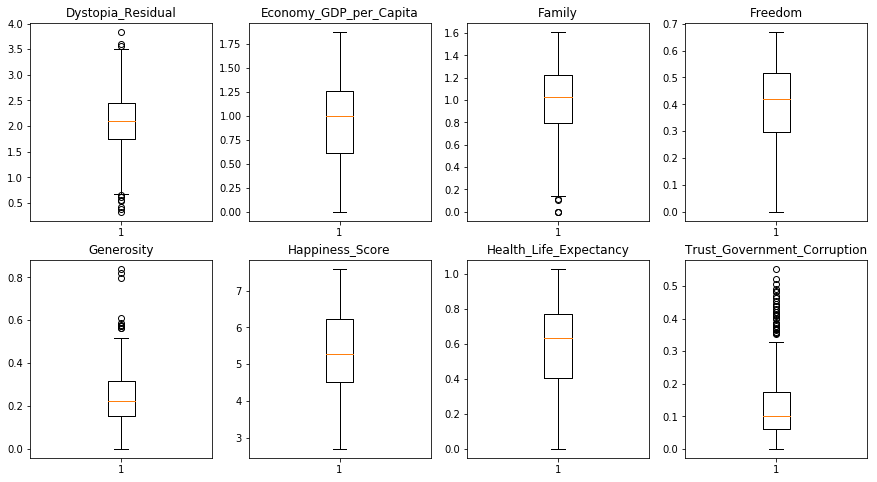

In [60]:
graph_by_eight_variables = ['Dystopia_Residual', 'Economy_GDP_per_Capita', 'Family', 'Freedom',
               'Generosity', 'Happiness_Score', 'Health_Life_Expectancy', 'Trust_Government_Corruption'] 
plt.figure(figsize=(15,8))

for i in range(0,8):
    plt.subplot(2, 4, i+1)
    plt.boxplot(Happiness_report2[graph_by_eight_variables[i]])
    plt.title(graph_by_eight_variables[i])
    
    
    

## 7. Feature Engineering

In [61]:
from scipy.stats.mstats import winsorize

Happiness_report2["winsorize_Dystopia_Residual"] = winsorize(Happiness_report2["Dystopia_Residual"], (0, 0.05))
Happiness_report2["winsorize_Family"] = winsorize(Happiness_report2["Family"], (0, 0.02))
Happiness_report2["winsorize_Generosity"] = winsorize(Happiness_report2["Generosity"], (0, 0.05))
Happiness_report2["winsorize_Trust_Government_Corruption"] = winsorize(Happiness_report2["Trust_Government_Corruption"], (0, 0.03))

### 7-a)Normallestirme

In [62]:
from sklearn.preprocessing import normalize

Happiness_report2["winsorize_Dystopia_Residual"] = normalize(np.array(Happiness_report2["winsorize_Dystopia_Residual"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Family"] =  normalize(np.array(Happiness_report2["winsorize_Family"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Generosity"] =  normalize(np.array(Happiness_report2["winsorize_Generosity"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Trust_Government_Corruption"] =  normalize(np.array(Happiness_report2["winsorize_Trust_Government_Corruption"]).reshape(1,-1)).reshape(-1,1)



### 7-b) PCA 

In [63]:
df_first_data= Happiness_report2[['Dystopia_Residual','Economy_GDP_per_Capita',
       'Family','Freedom', 'Generosity','Happiness_Score',
       'Health_Life_Expectancy', 'Trust_Government_Corruption']]

In [64]:
df_winsorize = Happiness_report2[['winsorize_Dystopia_Residual', 'winsorize_Family','winsorize_Generosity','winsorize_Trust_Government_Corruption']]

In [65]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pc = pca.fit_transform(df_first_data)
print (pca.explained_variance_ratio_)

[0.78205754 0.15296335]


In [66]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pc = pca.fit_transform(df_winsorize)
print (pca.explained_variance_ratio_)

[0.57185843 0.2250412 ]


#### Above as we see, PCA is working more accurate with first values. 
#### PCA results of df_winsorize shows that first value explains only %45 of the data set while df_first_data gives results of %78 for the first value.

## 8. Conclusions

Happiness score depends on each region with diferent shapes of distrubutions and relations within variables. 

As we see in pair plot show earlier, we have a positive corellation  between these variables. It is also happenning in each regions except Sub-Saharan Africa region. 

Data has been reseached via different acpects by using varied tools and arguments. Even though, data set gives us a clear understanding of corelations between variables, Happiness Score is explained by %78 percentage consedering PCA scores. 

Condering PCA results, we can say that due to the high correllations between variables effects PCA score so first values are enough to see relations between considered factors and Happiness Score. 

By following the results we see on this study, we can advise to extend variables and the number of participants to have an accurate understanding on Happiness Score. Happiness score has a high relation between Family, Economy GPD Capita and Health Life Expentency. 